# VenusMutHub Dataset Exploration

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tabpfn import TabPFNRegressor
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor


/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("AI4Protein/VenusMutHub", split="test")
df = ds.to_pandas()
df.head()


,protein_id,category,CARP,ESM1b,ESM1v,ESM2-650M,ESM_IF1,ESM_IF1_multichain,GEMME,MIF,...,Progen2-large,ProtGPT2,ProteinMPNN,ProteinMPNN_multichain,RITA-xlarge,SaProt_650M_PDB,Tranception_L,Tranception_no_retrieval_L,UniRep,VESPA
0,1BXZ_ee,selectivity,0.857143,0.857143,0.857143,0.857143,0.857143,NaN,0.857143,0.857143,...,0.857143,0.571429,0.714286,NaN,0.857143,0.714286,0.857143,0.857143,0.571429,0.857143
1,1MLC_2_Kd-wtKd-mut,small_molecule_binding,0.428571,0.428571,0.428571,0.571429,0.571429,NaN,0.571429,0.571429,...,0.428571,0.714286,0.285714,NaN,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429
2,1Z42_ee_1,selectivity,0.828571,0.857143,0.857143,0.828571,0.857143,NaN,0.857143,0.857143,...,0.828571,0.742857,0.685714,NaN,0.857143,0.828571,0.857143,0.857143,0.542857,0.857143
3,1Z42_ee_2,selectivity,0.413793,0.413793,0.413793,0.413793,0.413793,NaN,0.413793,0.413793,...,0.413793,0.413793,0.379310,NaN,0.413793,0.413793,0.413793,0.413793,0.620690,0.413793
4,1Z42_ee_3,selectivity,0.793103,0.793103,0.793103,0.793103,0.793103,NaN,0.793103,0.793103,...,0.793103,0.655172,0.655172,NaN,0.793103,0.793103,0.413793,0.344828,0.586207,0.793103


In [3]:
# Drop rows with missing values
df = df.dropna()

# Set target variable (e.g., 'activity', 'selectivity', etc.)
target_col = 'activity' if 'activity' in df.columns else df.columns[-1]
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target_col])
y = df[target_col]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = TabPFNRegressor()
model.fit(X_train, y_train)


TabPFNRegressor()

In [5]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.029452178562826524
R² Score: 0.7557943057935684


## Visualisations

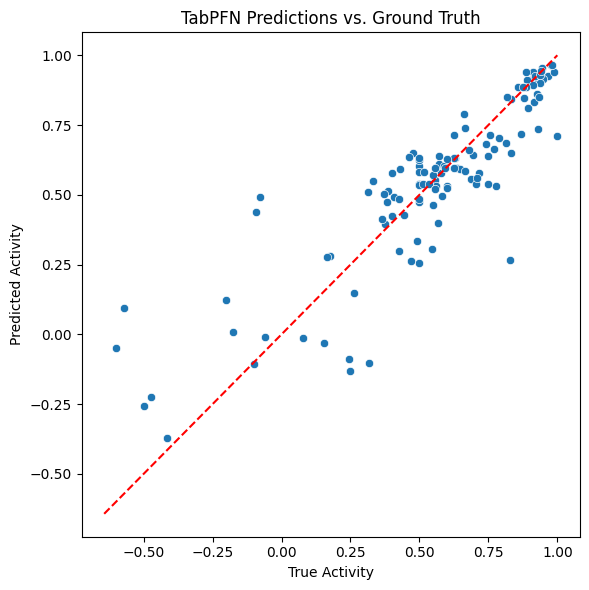

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Activity")
plt.ylabel("Predicted Activity")
plt.title("TabPFN Predictions vs. Ground Truth")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.tight_layout()
plt.show()


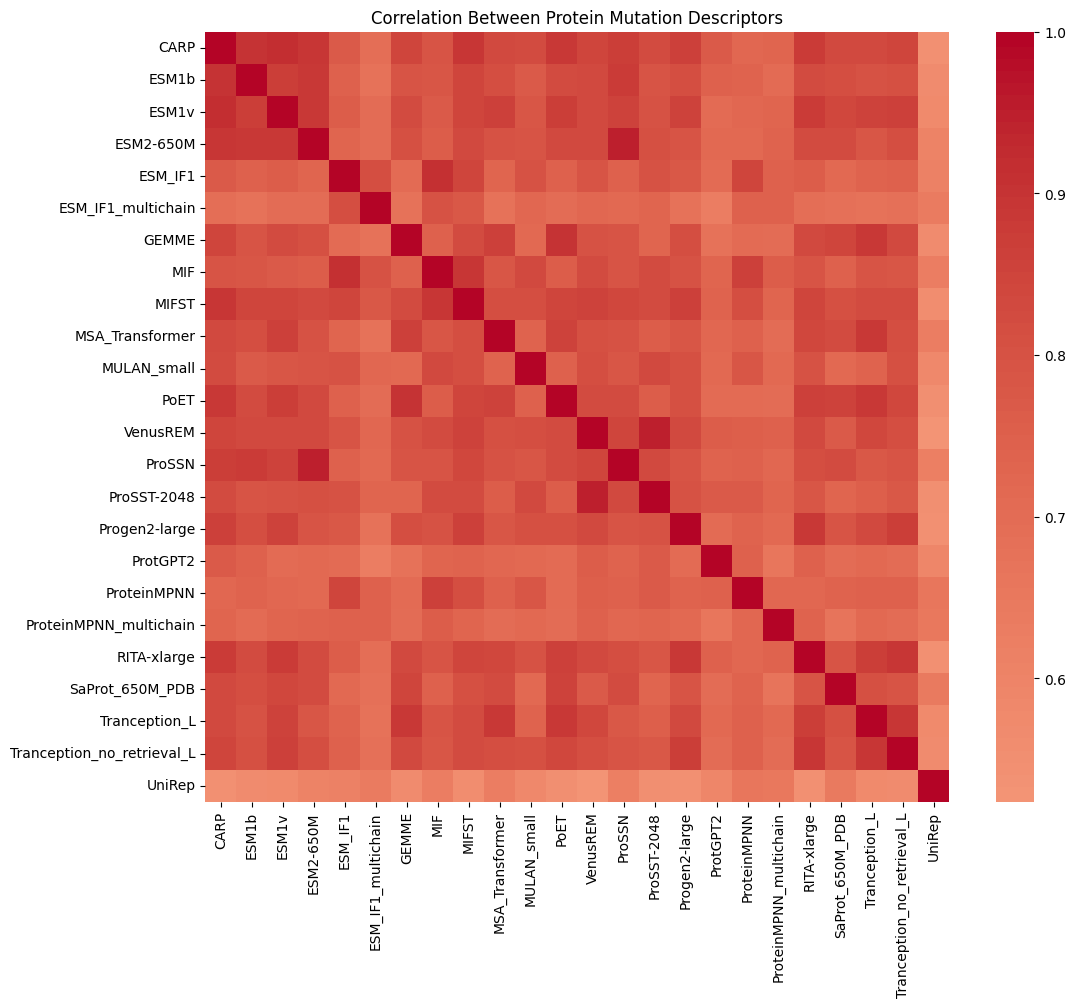

In [10]:
corr = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Protein Mutation Descriptors")
plt.show()


# Further Analysis Using TabPFN Extensions

In [6]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor

auto_model = AutoTabPFNRegressor(max_time=120, device="cpu")  # or "cpu" if no GPU
auto_model.fit(X_train, y_train)
auto_preds = auto_model.predict(X_test)

print("Auto Ensemble MSE:", mean_squared_error(y_test, auto_preds))
print("Auto Ensemble R²:", r2_score(y_test, auto_preds))

/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/tabpfn/base.py:101: UserWarning: Downloading model to /Users/rachaelchew/tabpfn-venusmuthub/tabpfn-extensions/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor.ckpt.
  model, bardist, config_ = load_model_criterion_config(
/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/tabpfn/base.py:101: UserWarning: Downloading model to /Users/rachaelchew/tabpfn-venusmuthub/tabpfn-extensions/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-2noar4o2.ckpt.
  model, bardist, config_ = load_model_criterion_config(
/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/tabpfn/base.py:101: UserWarning: Downloading model to /Users/rachaelchew/tabpfn-venusmuthub/tabpfn-extensions/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-09gpqh39.ckpt.
  model, bardist, config_ = load_model_criterion_config(
/Users/rachaelchew/tabpfn-venusmuthub/venv/lib/python3.9/site-packages/tabpfn/b

Auto Ensemble MSE: 0.029305999269747033
Auto Ensemble R²: 0.7570063660718577
